In [ ]:
!apt-get install git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
!git clone https://github.com/AdityaAVG/RL-model.git

Cloning into 'RL-model'...


In [ ]:
!cp

In [ ]:
#Policy gradient learning
#Goal is to optimize the policy directly of an agent to maximize cumulative rewards over time

In [ ]:
import gym
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
env=gym.make('CartPole-v1') #Here we are making an environment object


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
env


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<TimeLimit<OrderEnforcing<StepAPICompatibility<PassiveEnvChecker<CartPoleEnv<CartPole-v1>>>>>>

In [ ]:
state_dim=env.observation_space.shape[0]
action_dim=env.action_space.n

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(state_dim)
print(action_dim)

4
2


In [ ]:
#For RL we provide our environment as an input and get probabilities as output
class PolicyNetwork(nn.Module):
  def __init__(self,state_dim,action_dim):
    super(PolicyNetwork,self).__init__()
    self.linear1=nn.Linear(state_dim,128) #Linear layers function same as the fully connected layers.
    self.relu=nn.ReLU()
    self.linear2=nn.Linear(128,action_dim)
    self.softmax=nn.Softmax(dim=-1) # We want to apply softmax to the last dimension that's why .Although it will work without this also .
  def forward(self,state): # We are taking state because it is an input.
    state=self.linear1(state)
    state=self.relu(state)
    state=self.linear2(state)
    state=self.softmax(state) #Gives out the probability
    return state


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
policy=PolicyNetwork(state_dim,action_dim)
optimizer=optim.Adam(policy.parameters(),lr=0.003)

In [ ]:
def select_action(state):
  state=torch.from_numpy(state).float().unsqueeze(0)
  action_prob=policy(state)
  action=torch.multinomial(action_prob,num_samples=1) #It is returns the actual action by probabilities
  log_prob=torch.log(action_prob[0,action])
  return action.item(),log_prob

In [ ]:
def compute_returns(rewards,gamma=0.99):   #Cumulative rewards or the total amount of rewards earned by the agent over the time. Gamma is the discount factor (a float)
     returns=[]
     R=0
     for r in rewards[::-1]:   # We have reversed the list
      R=r+gamma*R
      returns.insert(0,R) #Inserting R at 0th index
     return returns



In [ ]:
# Training the model
num_episodes=1000  #It is actually the number of times the agent will interact with the environment to learn from it .
total_rewards=[]
for episode in range(num_episodes):
  state=env.reset()  #Initializes the environment to initial stage
  rewards=[]
  log_probs=[]
  for t in range(1000): #The max value but can break in between as well.  #From this block we will get the rewards which we will pass to compute the total rewards earned by agent over the time.
    action,log_prob=select_action(state)
    state,reward,done,_= env.step(action)  #This will actually step an action on env and gives the next or subsequent state,the reward we got here and whether or not the program is done running .
    rewards.append(reward)
    log_probs.append(log_prob)
    if done:
      break

  total_rewards.append(sum(rewards))
  returns=compute_returns(rewards)
  returns=torch.tensor(returns)

  policy_loss=[]
  for log_prob,R in zip(log_probs,returns):  #Combining two lists parallely having probability and the reward
    policy_loss.append(-log_prob*R)
  policy_loss=torch.stack(policy_loss).sum()  #This sums up the policy loss across all timestamps and turns it into scalar value
  optimizer.zero_grad()
  policy_loss.backward()
  optimizer.step()

  if episode % 100 ==0:
    print ('Episode:{} Total Reward:{} Length: {}\t'.format(episode,total_rewards[-1],t))




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Episode:0 Total Reward:16.0 Length: 15	
Episode:100 Total Reward:82.0 Length: 81	
Episode:200 Total Reward:268.0 Length: 267	
Episode:300 Total Reward:119.0 Length: 118	
Episode:400 Total Reward:136.0 Length: 135	
Episode:500 Total Reward:500.0 Length: 499	
Episode:600 Total Reward:253.0 Length: 252	
Episode:700 Total Reward:112.0 Length: 111	
Episode:800 Total Reward:134.0 Length: 133	
Episode:900 Total Reward:210.0 Length: 209	


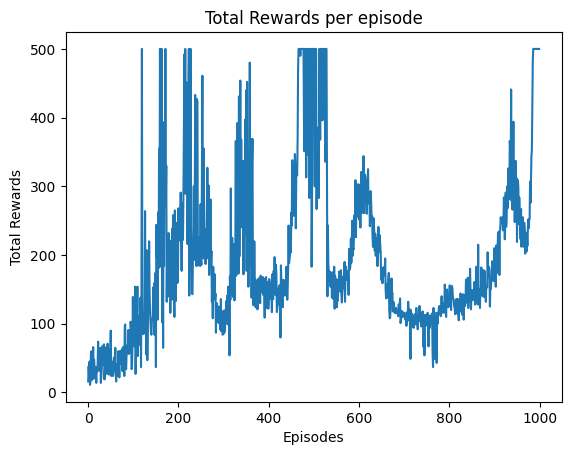

In [ ]:
import matplotlib.pyplot as plt
plt.plot(total_rewards)
plt.xlabel("Episodes")
plt.ylabel("Total Rewards")
plt.title("Total Rewards per episode")
plt.show()

In [ ]:
!apt-get update
!apt-get install -y xvfb #This creates a virtual display in the memory
!apt-get install -y python-opengl
!pip install gym pyvirtualdisplay


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:6 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
xvfb is already the newest version (2:21.1.4-2ubuntu1.7~22.04.11).
0 upgraded, 0 newly installed, 0 to remove and 52 not upgraded.
Reading

In [ ]:
from IPython import display as ipythondisplay
from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


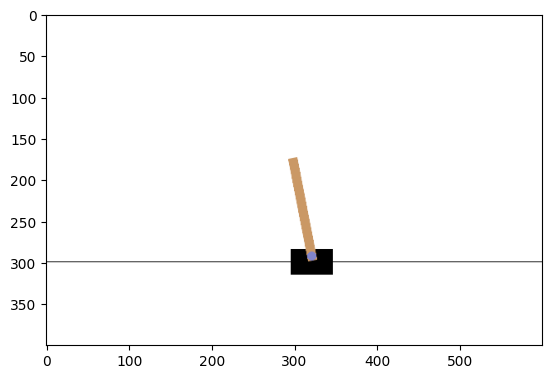

In [ ]:
state=env.reset()
img=plt.imshow(env.render(mode='rgb_array'))

#Random visualization
for t in range(1000):
  img.set_data(env.render(mode='rgb_array'))
  ipythondisplay.display(plt.gcf())
  ipythondisplay.clear_output(wait=True)
  #Taking a random action
  action=env.action_space.sample()
  state,reward,done,_=env.step(action)
  if done:
    break

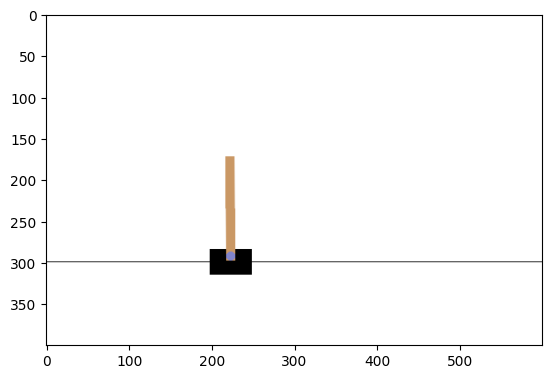

In [ ]:
#Changing the action (not taking a random action)
state=env.reset()
img=plt.imshow(env.render(mode='rgb_array'))

#Random visualization
for t in range(1000):
  img.set_data(env.render(mode='rgb_array'))
  ipythondisplay.display(plt.gcf())
  ipythondisplay.clear_output(wait=True)
  state_tensor=torch.from_numpy(state).float().unsqueeze(0)
  action_prob=policy(state_tensor)
  action=torch.multinomial(action_prob,num_samples=1)
  action=action.item()
  state,reward,done,_=env.step(action)
  if done:
    break